####Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных
*   airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*   balcony — число балконов
*   ceiling_height — высота потолков (м)
*   cityCenters_nearest — расстояние до центра города (м)
*   days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*   first_day_exposition — дата публикации
*   floor — этаж
*   floors_total — всего этажей в доме
*   is_apartment — апартаменты (булев тип)
*   last_price — цена на момент снятия с публикации
*   living_area — жилая площадь в квадратных метрах (м²)
*   locality_name — название населённого пункта
*   open_plan — parks_around3000 — число парков в радиусе 3 км
*   parks_around3000 — число парков в радиусе 3 км
*   parks_nearest — расстояние до ближайшего парка (м)
*   ponds_around3000 — число водоёмов в радиусе 3 км
*   ponds_nearest — расстояние до ближайшего водоёма (м)
*   rooms — число комнат
*   studio — квартира-студия (булев тип)
*   total_area — общая площадь квартиры в квадратных метрах (м²)
*   total_images — число фотографий квартиры в объявлении

Целью данного исследования является изучение имеющихся данных и выявление параметров влияющих на стоимость объектов. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Для реализации поставленной цели будут проделаны следующие шаги: изучена информация таблицы; произведена предобработка данных(проверка данных на пропуски, их изучение и при необходимости заполнение или удаление, проверка на дубликаты, анализ редких и выбивающих значений и их обработка, работа с типом данных); добавлены новые столбцы; изучены параметры объектов; проанализированы факторы влияющие на общую стоимость объекта; проанализирована средняя цена кв.м. в населенных пункта с наибольшим числом объявлений.


###1 Открытие и изучение файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

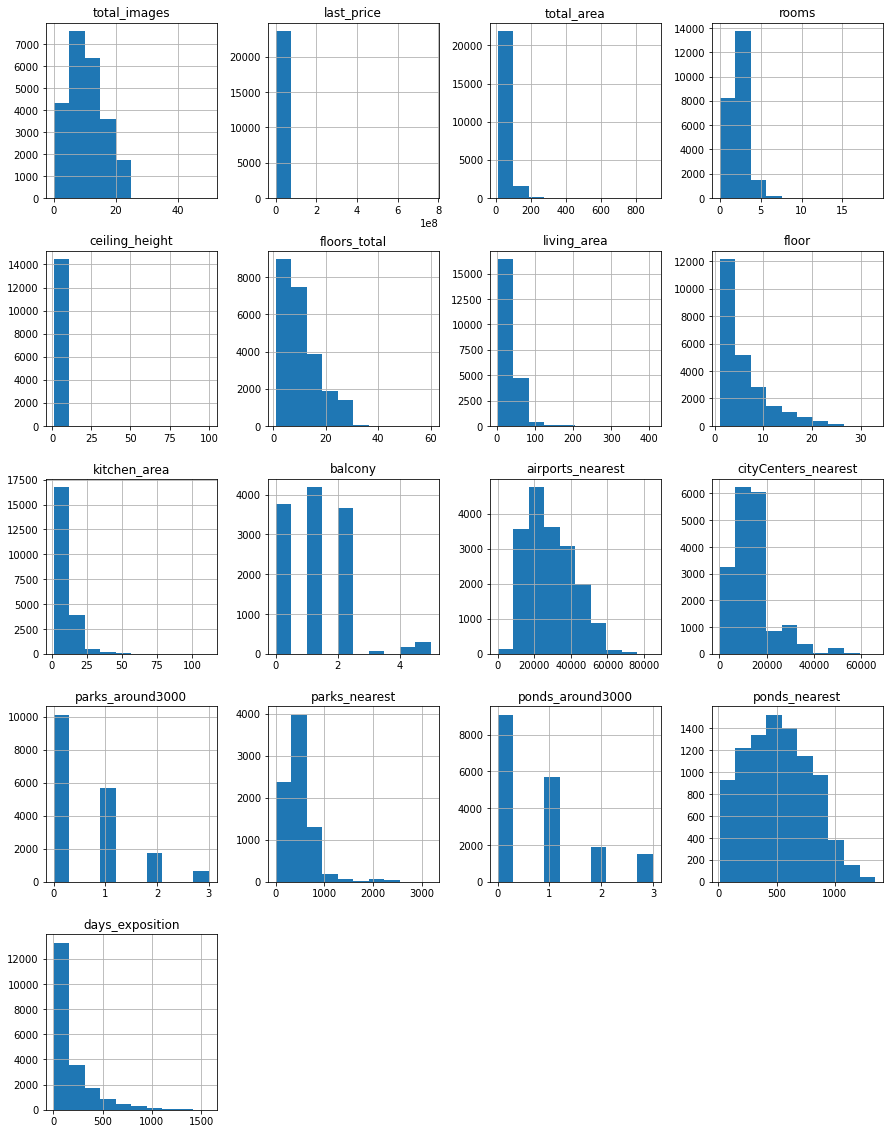

In [ ]:
data.hist(figsize=(15,20))

В рассматриваемой таблице с данными 23699 строк и 22 столбца. В 14 столбцах (ceiling_height,  floors_total, living_area,        floor, is_apartment, kitchen_area, balconyб locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) имеются пропуски. Стоит отметить, что в данных присутствуют явные аномалии и выбросы, как пример высота потолка не может быть 1 м или 100 м, а жилая площадь 2 кв.м. Также присутствуют столбцы, в которых неверные типы данных (как пример, first_day_exposition-дата не может быть  object).

###2 Предобработка данных

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [ ]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [ ]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [ ]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony','parks_around3000', 'ponds_around3000']].fillna(0)

In [ ]:
data[['balcony', 'parks_around3000', 'ponds_around3000']].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
dtype: int64

Пропуски в столбцах balcony, parks_around3000 и ponds_around3000 были заменены на 0. Рассмотрев уникальные значения данных столбцов, видно, что в них присутствуют значение 0, таким образом можно сделать вывод, что отсутствие водоема, парка или балкона могли продавцом быть указаны как 0, либо просто не указаны.

In [ ]:
data.query('parks_nearest.isna()')['parks_around3000'].unique()

array([0.])

In [ ]:
data.query('ponds_nearest.isna()')['ponds_around3000'].unique()

array([0.])

Столбцы parks_nearest и ponds_nearest не заполнены, вероятнее всего намерено, т.к. видно, что они не заполнены именно по тем строчкам, где в столбцах parks_around3000 и ponds_around3000 стоят 0 (отсутствует водоем и парк).

In [ ]:
data[data['locality_name'].isna()]['cityCenters_nearest'].describe()

count       41.000000
mean     11278.902439
std       8910.058254
min       1322.000000
25%       4383.000000
50%       8943.000000
75%      17369.000000
max      41294.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
(data.query('cityCenters_nearest<41294')
     .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=('min', 'max'))
     .sort_values(by='min')
)

,max,min
locality_name,,
Санкт-Петербург,29493.0,181.0
посёлок Шушары,32079.0,17012.0
посёлок Парголово,24415.0,17994.0
посёлок Стрельна,24134.0,21813.0
поселок Мурино,21888.0,21888.0
Пушкин,35610.0,24311.0
посёлок Левашово,25727.0,25727.0
посёлок Песочный,27835.0,25867.0
посёлок Лисий Нос,28226.0,26368.0


In [ ]:
data.loc[data['cityCenters_nearest']<17012.0,'locality_name'] = 'Санкт-Петербург'

In [ ]:
data['locality_name'].isna().sum()

20

Исходя из данных - квартиры с расстоянием до центра не превышающие 17012 находяться только в Санкт-Петербурге, соответственно все пропуски с таким же растоянием в столбце locality_name заполняем значением "Санкт-Петербург".

In [ ]:
data[data['is_apartment']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,...,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [ ]:
data[data['is_apartment']==False]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,...,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,NaN,19.0,52.0,15,False,...,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,NaN,9.0,27.0,9,False,...,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,NaN,6.0,18.2,1,False,...,14.6,0.0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131.0
23667,14,9990000.0,90.0,2017-01-23T00:00:00,3,3.06,17.0,55.0,9,False,...,11.0,2.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,86.0
23671,3,3450000.0,35.3,2017-04-14T00:00:00,1,2.50,9.0,17.5,4,False,...,7.5,2.0,Санкт-Петербург,21435.0,15261.0,1.0,334.0,1.0,232.0,21.0
23678,10,3500000.0,43.0,2016-05-19T00:00:00,2,2.50,3.0,26.1,2,False,...,4.9,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0


Столбец 'is_apartment' осталяем не заполненным, т.к. рассмотрев все параметры жилых объектов, найти объединяющие, по которым можно было бы отнести объект к аппартаментам нет возможности.

В столбцах ceiling_height, floors_total, kitchen_area, living_area пропуски оставляем, т.к. учитывая количество данных, которое у нас имеется мы не сможем предложить логичную замену. При наличии года постройки, серии дома и т.п можно было бы провести анализ и восстановить часть данных. При наличии квадратуры нежилых помещений можно было бы восстановить жилую площадь. А так слишком велики риски искажения окончательных выводов в случае заполнения пропусков средними, либо медиальными значениями, т.к. дома могут быть совершенно разными и не подходить под усредненные показатели. Причиной пропусков в данных столбцах может быть как невнимательность продавца, так и его намеренное утаивание информации, как пример, реальная низкая высота потолка, малоэтажный дом, маленький метраж кухни, жилой площади.

Столбцы airports_nearest и cityCenters_nearest также не заполняем, т.к. при отсутствии адреса или координат трудно точно восстановить данные, а риск исказить выводы велик.

Столбец days_exposition не заполняем, т.к. скорее всего он не заполнен в связи с тем, что объявление не было снято с публикации и размещено.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23679 non-null  object 
 15  airports_nearest   

In [ ]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [ ]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В столбце first_day_exposition тип данных изменен на datetime для возможности в дальнейшем работать с данными как с датой. В столбцах 'balcony', 'parks_around3000', 'ponds_around3000' изменен тип данных на int для удобства работы, т.к это количественные показатели.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data['locality_name_new'] = data['locality_name'].str.replace(r'[ё]','е', regex=True).str.replace(r'\b[городской]+\s','', regex=True).str.replace(r'\b[типа]+\s','', regex=True)

In [ ]:
data['locality_name_new'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Столбец с названиями населенных пунктов рассмотрен на предмет неявных дубликатов и в таблицу дабавлен новый столбец 'locality_name_new' с названиями без дубликатов.

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


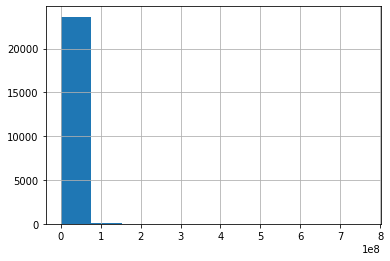

In [ ]:
data['last_price'].hist(bins=10);

In [ ]:
(data['last_price']/1000).describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

In [ ]:
(data['last_price']>100000000).sum()

37

In [ ]:
data.query('last_price<50000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,Санкт-Петербург


In [ ]:
data = data[(data['last_price']<100000000) & ((data['last_price']>13000))]

In [ ]:
(data['last_price']/1000).describe()

count    23661.000000
mean      6251.771331
std       6424.397420
min        430.000000
25%       3400.000000
50%       4635.000000
75%       6750.000000
max      99000.000000
Name: last_price, dtype: float64

В столбце last_price удалены 37 редких значений превышающих 100000000. Также удалена строка с ценой 12190, которая явно с ошибкой, скорее всего в цене не хватает нулей, но по имеющимся данным востановить цену возможности нет.

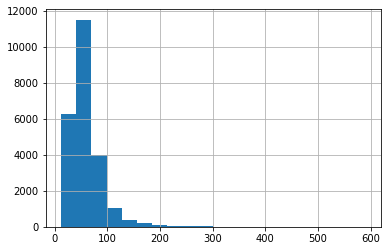

In [ ]:
data['total_area'].hist(bins=20);

In [ ]:
data['total_area'].describe()

count    23661.000000
mean        59.925974
std         33.470704
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

In [ ]:
(data['total_area']>=250).sum()

93

In [ ]:
data = data[data['total_area']<250]

In [ ]:
data['total_area'].describe()

count    23568.000000
mean        58.865667
std         28.554787
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

Чтобы избвится от совсем больших значений, но не потерять значительное количество данных удаляем в столбце total_area значения превышающие 250 кв.м.

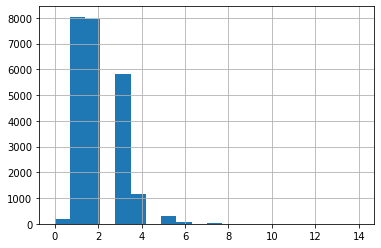

In [ ]:
data['rooms'].hist(bins=20);

In [ ]:
data['rooms'].describe()

count    23568.000000
mean         2.049644
std          1.025866
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

In [ ]:
data['rooms'].value_counts()

1     8046
2     7938
3     5802
4     1163
5      291
0      196
6       82
7       37
8        7
9        2
11       2
10       1
14       1
Name: rooms, dtype: int64

In [ ]:
(data['rooms']>6).sum()

50

In [ ]:
data = data[data['rooms']<7]

In [ ]:
data['rooms'].describe()

count    23518.000000
mean         2.037886
std          0.992836
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Удаляем из таблицы строки с количеством комнат 7 и более, количество такой недвижимости небольшое - 50 объектов (7-комнатные - 37 квартир, 8-комнатных - 7, с большим количеством - единичные случаи).

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.5 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
         3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,   2.68,
      

In [ ]:
for value in data['ceiling_height']:
    if 20 <= value < 100:
        data.loc[(data['ceiling_height'] == value), 'ceiling_height'] = value/10

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.5 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,   3.6 ,
         2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,
         2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,   4.06,
         2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,   3.65,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,   3.86,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,   3.26,
         3.34,   2.81,   3.44,   2.97,   4.37,   2.68,   3.9 ,   3.22,
      

In [ ]:
data = data.loc[(data['ceiling_height'] >= 2) & (data['ceiling_height'] < 6) | (data['ceiling_height'].isna())]

In [ ]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.5 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.  , 2.79, 2.95, 4.06, 2.94, 3.54,
       3.53, 2.83, 2.4 , 3.38, 3.01, 3.65, 3.18, 3.35, 2.3 , 3.57, 2.48,
       2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87,
       3.66, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.86, 3.08, 3.68, 3.07,
       3.37, 3.09, 3.16, 3.26, 3.34, 2.81, 3.44, 2.97, 4.37, 2.68, 3.9 ,
       3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.14, 3.32, 2.98,
       2.86, 3.17, 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.78,
       4.3 , 3.39, 2.69, 4.4 , 3.31, 5.3 , 3.56, 2.2 , 3.85, 3.93, 3.42,
       2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.51, 2.

В столбце ceiling_height высота потолков 32, 27, 26, 25, 24, 22.6, 20 были заменены вещественными показателями, т.к. здесь можно сделать вывод, что при заполнении объявления была допущена ошибка и не проставлена запятая. Аномально высокие значения (больше 6 м) и аномально низкие (ниже 2 м) были удалены.

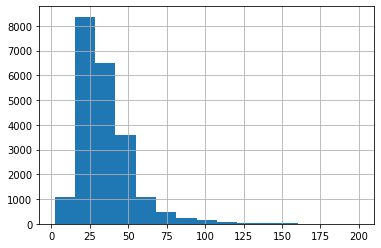

In [ ]:
data['living_area'].hist(bins=15);

In [ ]:
data['living_area'].describe()

count    21627.000000
mean        33.485746
std         18.126598
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

In [ ]:
(data['living_area']<10).sum()

25

In [ ]:
(data['living_area']>150).sum()

28

In [ ]:
data = data.loc[(data['living_area']>=10) & (data['living_area']<=150) | (data['living_area'].isna())]

В столбце living_area удалены аномально малые значения ниже 10, и значения свыше 150.

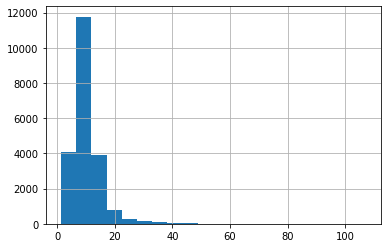

In [ ]:
data['kitchen_area'].hist(bins=20);

In [ ]:
data['kitchen_area'].describe()

count    21207.000000
mean        10.403185
std          5.446389
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [ ]:
(data['kitchen_area']>45).sum()

48

In [ ]:
data = data.loc[(data['kitchen_area']<=45) | (data['kitchen_area'].isna())]

In [ ]:
data['kitchen_area'].describe()

count    21159.000000
mean        10.294435
std          4.906169
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         45.000000
Name: kitchen_area, dtype: float64

В столбце kitchen_area удаляем строки с метражом кухни более 45 кв.м.

In [ ]:
data['balcony'].value_counts()

0    15058
1     4148
2     3644
5      301
4      178
3       78
Name: balcony, dtype: int64

In [ ]:
data.pivot_table(index='balcony', columns = 'rooms',  values = ['total_area'])

total_area                                                           \
rooms            0          1          2          3           4           5   
balcony                                                                       
0        28.429259  37.167632  55.612885  76.957478  103.284754  139.017674   
1        26.483793  37.106455  53.215972  76.203462  101.078467  151.418684   
2        27.158452  39.234440  58.785626  76.299384  107.649213  112.233333   
3              NaN  31.550000  61.890476  84.773659  103.687273  131.066667   
4              NaN  43.189375  61.149167  89.152750  109.744444  142.625000   
5              NaN  47.564583  66.337108  82.055964  111.543478  183.896000   

                     
rooms             6  
balcony              
0        158.462069  
1        171.220000  
2        175.900000  
3               NaN  
4               NaN  
5               NaN

В столбце с количеством балконов ('balcony') присутствуют значения - 3, 4, 5, что кажется маловероятным, т.к. такое количество балконов присутствует и в однокомнатных квартирах, как вариант, это может быть объяснено тем, что вместо количества балконов проставляли метраж. В данном столбце оставим все значения без изменений, т.к. одназначно определить по метражу количество балконов не предствляется возможным.

In [ ]:
data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']].describe()

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
count,17876.000000,17896.000000,7889.000000,8923.000000
mean,28826.863113,14301.237204,492.096590,520.409167
std,12688.548714,8594.218140,343.321441,277.405187
min,0.000000,181.000000,1.000000,13.000000
25%,18500.000000,9442.750000,288.000000,298.000000
50%,26806.500000,13164.500000,456.000000,504.000000
75%,37365.000000,16357.750000,613.000000,733.000000
max,84869.000000,65968.000000,3190.000000,1344.000000


In [ ]:
(data['parks_nearest'] < 10).sum()

6

In [ ]:
data = data.loc[(data['parks_nearest']>10) | (data['parks_nearest'].isna())]

In [ ]:
(data['ponds_nearest'] == 13).sum()

2

In [ ]:
data = data[data['ponds_nearest']!=13]

In [ ]:
(data['airports_nearest']==0).sum()

1

In [ ]:
data = data[data['airports_nearest']!=0]

В столбце 'airports_nearest', 'parks_nearest', 'ponds_nearest' удаляем аномальные значения, которые скорее всего являются ошибкой.

In [ ]:
data['days_exposition'].describe()

count    20278.000000
mean       179.861475
std        218.678077
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

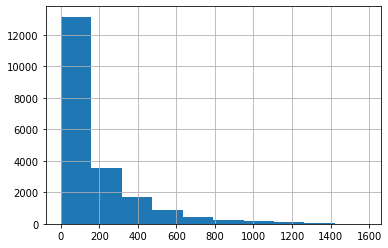

In [ ]:
data['days_exposition'].hist();

In [ ]:
(data['days_exposition']>1400).sum()

19

In [ ]:
data = data.loc[(data['days_exposition']<1400) | (data['days_exposition'].isna())]

In [ ]:
data['days_exposition'].describe()

count    20259.000000
mean       178.641888
std        215.116314
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1396.000000
Name: days_exposition, dtype: float64

В столбце 'days_exposition' удалены значения свыше 1400 дней

Столбцы таблицы были рассмотрены на предмет аномалий и редких значений. Строки с самыми значительными отклонениями были удалены, однако, сохранялся подход удалить минимум данных. Обнаруженые аномалии, которым можно логично предложить замены были заменены (высота потолков), а те, где для замены не хватает данных таблицы оставлены(количество балконов), либо удалены.

Приводим наименование столбцов к змеиному регистру:

In [ ]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000': 'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})

Производим расчет доли удаленных данных из всего датафрейма:

In [ ]:
1-data['total_images'].count()/23699

0.013798050550656193

###3 Добавление новых столбцов

In [ ]:
data['price_square_meter'] = data['last_price']/data['total_area']    # цена одного кв.м

In [ ]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday   # день недели публикации объявления

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month    # месяц публикации объявления

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year    # год публикации объявления

In [ ]:
def type_floor(row):

    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'


In [ ]:
data['type_floor'] = data.apply(type_floor, axis=1) # тип этажа квартиры

In [ ]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [ ]:
data['city_centers_nearest_km'] = data['city_centers_nearest'].apply(lambda x: round(x/1000, 0))  #расстояние до центра города в км

In [ ]:
data[['price_square_meter', 'day_of_week_exposition', 'month_exposition', 'year_exposition', 'type_floor', 'city_centers_nearest_km']]

,price_square_meter,day_of_week_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
0,120370.370370,3,3,2019,другой,16.0
1,82920.792079,1,12,2018,первый,19.0
2,92785.714286,3,8,2015,другой,14.0
3,408176.100629,4,7,2015,другой,7.0
4,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...
23694,72490.845228,1,3,2017,другой,4.0
23695,52542.372881,0,1,2018,другой,NaN
23696,44091.710758,6,2,2018,первый,NaN
23697,149511.400651,1,3,2017,другой,10.0


###4 Исследовательский анализ данных

**Общая площадь**

In [ ]:
data['total_area'].describe()

count    23372.000000
mean        58.209402
std         26.959843
min         12.000000
25%         40.000000
50%         51.750000
75%         68.700000
max        244.000000
Name: total_area, dtype: float64

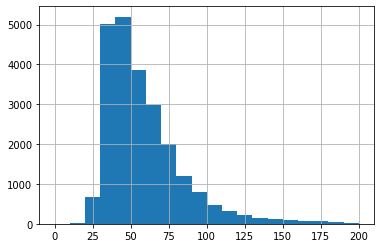

In [ ]:
data['total_area'].hist(bins=20, range=(0,200));

Большинство размещенных объявлений на продажу квартир с площадью 30-50 кв.м., также присутствует значительное количество квартир с площадью до 75 кв.м., и мы видим прямую зависимость как с увеличением площади уменьшается количество объявлений. Квартир с площадью менее 30 кв.м. незначительное количество, причем количество объектов с площадью менее 20 стремиться к 0.

**Жилая площадь**

In [ ]:
data['living_area'].describe()

count    21495.000000
mean        33.287244
std         17.455966
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

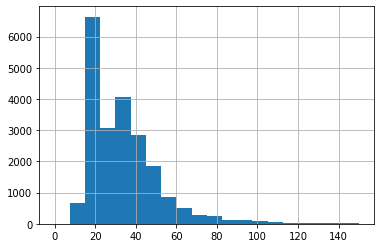

In [ ]:
data['living_area'].hist(bins=20, range=(0,150));

Подавляющее большинство объявлений размещено на квартиры с жилой площадью в районе 20 кв.м., свыше 20 кв.м. предложение уменьшается, однако, в районе 30 кв.м. есть увеличение, но дальше уже с увеличением жилой площади количество объявлений начинает снижаться и мы видим, что при площади более 110 кв.м. количество объявлений стремиться к 0. Предложений квартир с площадью менее 18 кв.м. незначительное количество.

**Площадь кухни**

In [ ]:
data['kitchen_area'].describe()

count    21126.000000
mean        10.291083
std          4.899773
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         45.000000
Name: kitchen_area, dtype: float64

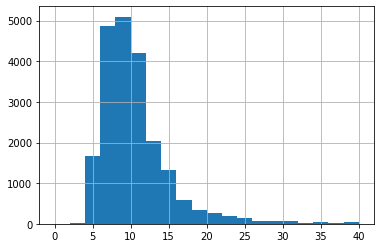

In [ ]:
data['kitchen_area'].hist(bins=20, range=(0,40));

Площадь кухни в большинстве объявлений в пределах 7-12 кв.м. с максимальным количеством в районе 8-10 кв.м.. Здесь также наблюдается снижение предложений с увеличением площади. Присутствуют предложения с площадью кухни в районе 4-6 кв.м., предложения менее 4 кв.м. носят единичный характер.

**Цена объекта**

In [ ]:
data['last_price'].describe()

count    2.337200e+04
mean     5.970450e+06
std      5.366267e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.690000e+06
max      9.800000e+07
Name: last_price, dtype: float64

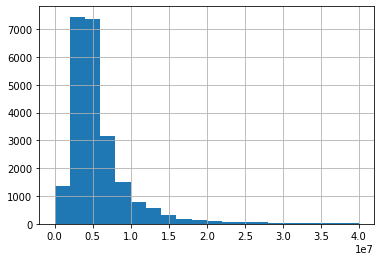

In [ ]:
data['last_price'].hist(bins=20, range=(0,40000000));

В большинстве объявлений цена находиться в пределах 2-5 млн.руб., предложений с ценой в пределах 5-7 млн. меньше почти в 2,5 раза, далее с увеличением стоимости объекта число предложений продолжает снижаться, свыше 25 млн. это уже единичные случаи. Присутствует предложение и квартир с ценой ниже 2 млн. руб., но их количество в примерно в 5 раз меньше, чем у большинства.

**Количество комнат**

In [ ]:
data['rooms'].describe()

count    23372.000000
mean         2.032603
std          0.986520
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

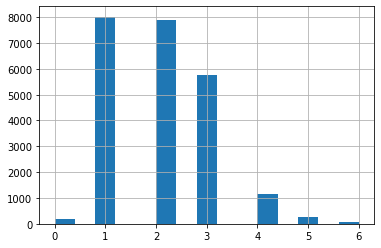

In [ ]:
data['rooms'].hist(bins=15, range=(0,6));

Среди объявлений лидируют квартиры с 1 и 2 комнатами, также заметное количество с 3 комнатами, присутствует незначительное предложение 4-х комнатных квартир. Количество объектов с 0 комнат(студии) и 5 комнатами ничтожно мало, 6 комнат - единичные случаи.

**Высота потолков**

In [ ]:
data['ceiling_height'].describe()

count    14275.000000
mean         2.718462
std          0.264233
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

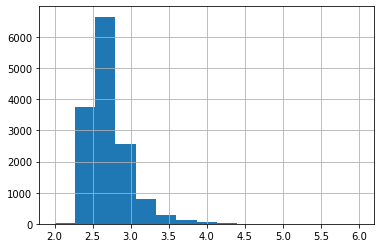

In [ ]:
data['ceiling_height'].hist(bins=15, range=(2,6));

В большинстве объявлений указана высота потока в промежутке 2.5 - 2.7 м., почти в 2 раза меньше объявлений с высотой потолка 2.25-2.5, ниже 2.25 - единичные случаи. Предложений квартир с потолками в районе 2.7 - 3 м. почти в 3 раза меньше, чем у большинства. С увеличением высоты потолка уменьшается количество объявлений и стремится к 0.

**Этаж квартиры**

In [ ]:
data['floor'].describe()

count    23372.000000
mean         5.901549
std          4.893502
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

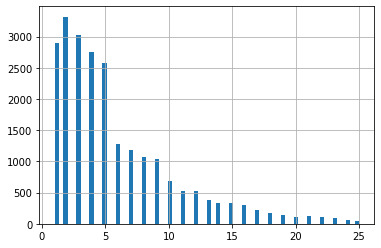

In [ ]:
data['floor'].hist(bins=70, range=(1,25));

Самое большое число выставленных на продажу квартир, располагаются на 2-м этаже, далее в порядке убывания предложений следуют квартиры расположенные на 3-м, 1-м, 4-м и 5-м этажах. Среди общего количества преобладают именно предложения квартир, которые располагаются с 1 по 5 этажи. Предложений на квартиры, расположенные на 6 этаже уже более, чем в 2 раза меньше, также наблюдается тенденция снижения числа предложений с увеличением этажа, где находится квартира.

**Тип этажа квартиры**

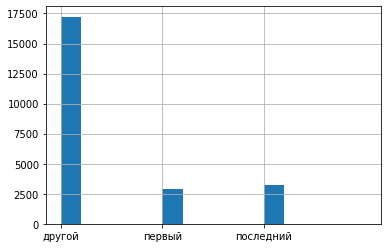

In [ ]:
data['type_floor'].hist(bins=15, range=(0,3));

Несмотря на большое количество объявлений на продажу квартир, расположенных на 1-м этаже, в общем объеме объявлений данный тип квартир занимает самый маленький процент, чуть больше объявлений на квартиры, расположенные на последнем этаже, но даже суммарно эти 2 типа раза в 3 меньше предложений на квартиры, относящиеся к типу "другой".

**Общее количество этажей в доме**

In [ ]:
data['floors_total'].describe()

count    23287.000000
mean        10.714819
std          6.604972
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

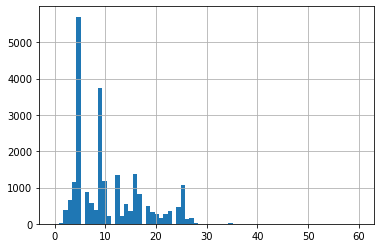

In [ ]:
data['floors_total'].hist(bins=70, range=(0,60));

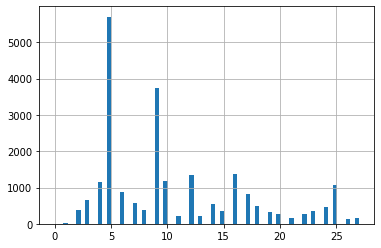

In [ ]:
data['floors_total'].hist(bins=70, range=(0,27));

Большинство квартир продаются в 5-этажных домах, далее выделяется группа объявлений на продажу в 9-этажных домах, которая приблизительно в 1.5 раза меньше. Можно также отметить группу объектов с 4,10,12,16,25 этажами, число объявлений в данной группе в среднем больше, чем у остальных. Здесь не наблюдается зависимости числа предложений от этажности дома. Продажа квартир в домах превышающих 27 этажей - это единичные случаи.

**Расстояние до центра города в метрах**

In [ ]:
data['city_centers_nearest'].describe()

count    17863.000000
mean     14297.902928
std       8584.540300
min        181.000000
25%       9442.500000
50%      13166.000000
75%      16347.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

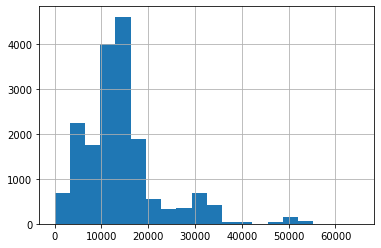

In [ ]:
data['city_centers_nearest'].hist(bins=20, range=(0,65000));

Большинство продаваемых квартир находятся на расстоянии приблизительно 10-16 км от центра города, с уменьшением расстояния количество объявлений уменьшается, однако, в районе 3-6 км. есть увеличение. Также и с увеличением расстояния количество объявлений уменьшается, но есть небольшое увеличение в районе 30-32 км.

**Расстояние до ближайшего аэропорта**

In [ ]:
data['airports_nearest'].describe()

count    17843.000000
mean     28820.691868
std      12679.585966
min       6450.000000
25%      18499.000000
50%      26803.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

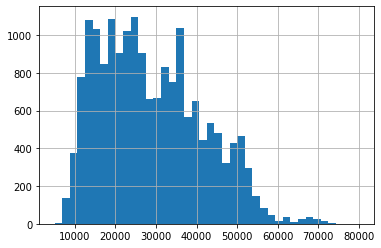

In [ ]:
data['airports_nearest'].hist(bins=40, range=(5000,80000));

Большинство продаваемых объектов расположены  на расстоянии от аэропорта в диапазоне 10-37 км, среди этого диапазона наблюдаются то повышение, то понижение числа объявлений, это можно объяснить расположением квартир в различных по численности населенных пунктах. С увеличением расстояния свыше 37 км. число объявлений имеет тенденцию к снижению, однако здесь также наблюдается колебание количества предложений в зависимости от расстояния.

**Расстояние до ближайшего парка**

In [ ]:
data['parks_nearest'].describe()

count    7863.000000
mean      492.583238
std       342.611994
min        11.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

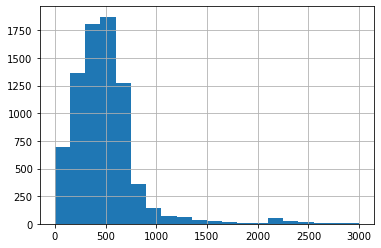

In [ ]:
data['parks_nearest'].hist(bins=20, range=(0,3000));

Большинство продаваемых квартир с наличием в радиусе 3 км парка, располагаются на расстоянии приблизительно в 300-600 м от парка, объявлений с расстоянием до парка менее 150 м почти в 3 раза меньше. Также присутствует значительное количество объявлений с расстоянием приблизительно 150-300 и 600-750 м. С увеличение расстояния до парка свыше 750 м объявлений становиться меньше.

**День и месяц публикации**

In [ ]:
data['day_exposition'] = data['first_day_exposition'].dt.day

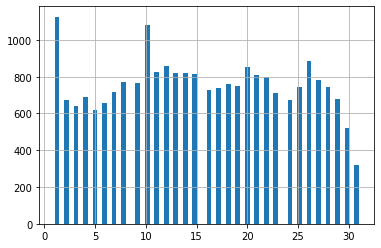

In [ ]:
data['day_exposition'].hist(bins=64);

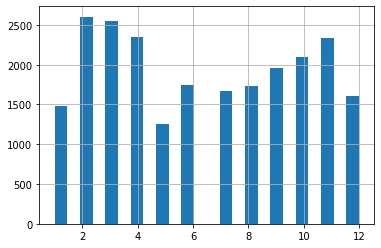

In [ ]:
data['month_exposition'].hist(bins=24);

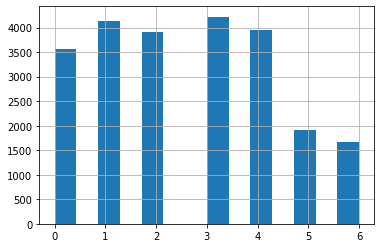

In [ ]:
data['day_of_week_exposition'].hist(bins=14);

Рассматривая числа публикации объявлений можно выделить 1 и 10, в эти числа месяца публикуется больше объявлений, чем в другие числа. Рассматривая распределение по месяцам видно, что больше всего публикаций было в феврале и марте, немного меньше в апреле и ноябре, кроме того стоит отметить, что число публикаций в апреле и ноябре приблизительно одинаковое. Меньше всего объявлений размещают в мае (можно предположить влияние майских праздников), также присутствует тенденция увеличения числа публикаций объявлений с июня по ноябрь. Немного меньше, чем в остальные месяцы публикуют в декабре и январе(можно предположить, что оказывает влияние новый год и новогодние праздники). Рассматривая распределение по дням недели видно, что в основном объявления размещают с понедельника по пятницу (в течение рабочей недели), в выходные публикуют меньше объявлений (разница минимум в 2 раза).

**Как быстро продавались квартиры**

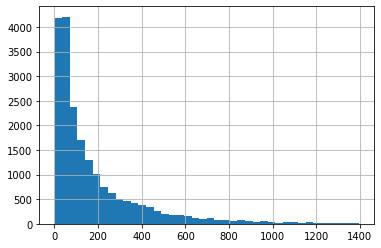

In [ ]:
data['days_exposition'].hist(bins=40);

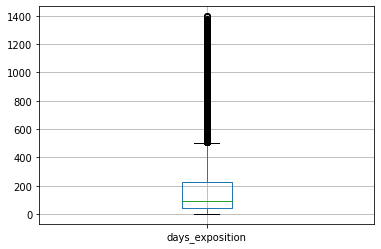

In [ ]:
data.boxplot(column='days_exposition');

In [ ]:
data['days_exposition'].mean()

178.64188755614788

In [ ]:
data['days_exposition'].median()

95.0

In [ ]:
data['days_exposition'].describe()

count    20259.000000
mean       178.641888
std        215.116314
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1396.000000
Name: days_exposition, dtype: float64

In [ ]:
data['days_exposition'].value_counts().sort_index().head(10)

1.0       1
2.0       3
3.0     158
4.0     176
5.0     150
6.0     124
7.0     232
8.0     136
9.0     140
10.0    127
Name: days_exposition, dtype: int64

**Влияние факторов на цену**

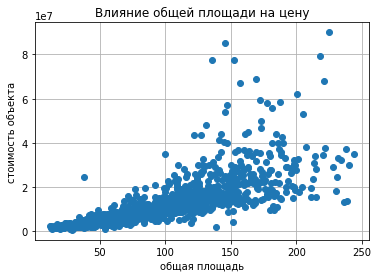

In [ ]:
(data.pivot_table(index='total_area', values='last_price')
     .plot(style='o', grid=True, xlabel='общая площадь', ylabel='стоимость объекта',
           title='Влияние общей площади на цену',legend=None)
);

In [ ]:
data['total_area'].corr(data['last_price'])

0.7388732832889466

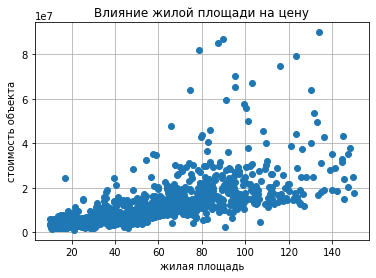

In [ ]:
(data.pivot_table(index='living_area', values='last_price')
     .plot(style='o', grid=True, xlabel='жилая площадь', ylabel='стоимость объекта',
           title='Влияние жилой площади на цену',legend=None)
);

In [ ]:
data['living_area'].corr(data['last_price'])

0.6409385957924412

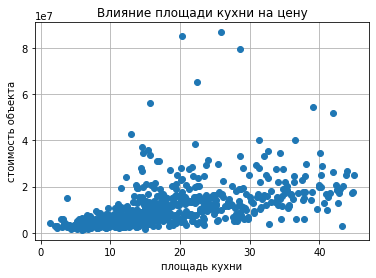

In [ ]:
(data.pivot_table(index='kitchen_area', values='last_price')
     .plot(style='o', grid=True, xlabel='площадь кухни', ylabel='стоимость объекта',
          title='Влияние площади кухни на цену',legend=None)
);

In [ ]:
data['kitchen_area'].corr(data['last_price'])

0.5458159954859932

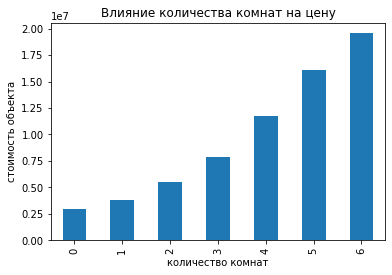

In [ ]:
(data.pivot_table(index='rooms', values='last_price')
     .plot.bar(xlabel='количество комнат', ylabel='стоимость объекта',
              title='Влияние количества комнат на цену',legend=None)
);

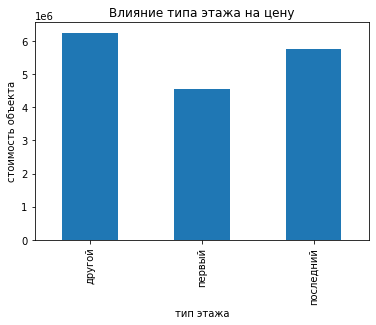

In [ ]:
(data.pivot_table(index='type_floor', values='last_price')
     .plot.bar(xlabel='тип этажа', ylabel='стоимость объекта',
              title='Влияние типа этажа на цену',legend=None)
);

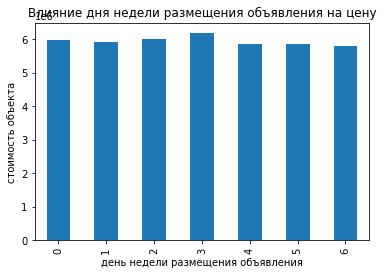

In [ ]:
(data.pivot_table(index='day_of_week_exposition', values='last_price')
     .plot.bar(xlabel='день недели размещения объявления', ylabel='стоимость объекта',
              title='Влияние дня недели размещения объявления на цену',legend=None)
);

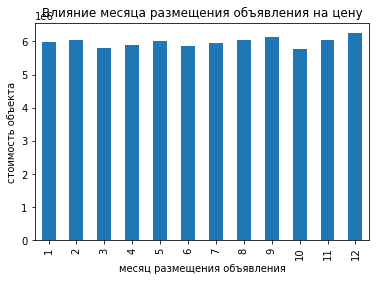

In [ ]:
(data.pivot_table(index='month_exposition', values='last_price')
     .plot.bar(xlabel='месяц размещения объявления', ylabel='стоимость объекта',
              title='Влияние месяца размещения объявления на цену', legend=None)
);

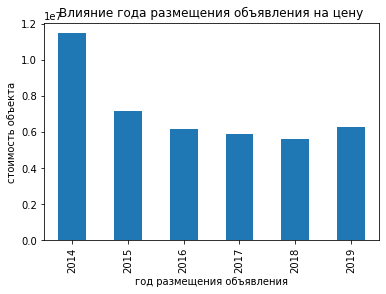

In [ ]:
(data.pivot_table(index='year_exposition', values='last_price')
     .plot.bar(xlabel='год размещения объявления', ylabel='стоимость объекта',
              title='Влияние года размещения объявления на цену',legend=None)
);

Существует прямая зависимость цены от количества комнат (с увеличением количества комнат - увеличивается цена), зависимость цены от этажа (квартиры на первом этаже стоят меньше всего, также по сравнению с другими этажами квартиры на последнем этаже дешевле), зависимость цены от года размещения. Месяц и день недели размещения объявления на стоимость влияния не оказывают. Существует также некоторая зависимость цены от площади (общей, жилой, кухни), причем зависимость от общей площади более явная, однако видно, что помимо площади на цену влияют и другие факторы, т.к. присутствуют исключения.

**10 населённых пункта с самой высокой и низкой стоимостью квадратного метра**

In [ ]:
names_10 = data['locality_name_new'].value_counts().head(10).index
data_names_10 = (data.query('locality_name_new in @names_10')
                     .pivot_table(index='locality_name_new', values='price_square_meter')
                 )
data_names_10['price_square_meter'] = data_names_10['price_square_meter'].round(2)
data_names_10 = data_names_10.reset_index()
data_min_max = data_names_10.query('price_square_meter == price_square_meter.max() | price_square_meter == price_square_meter.min()')
data_names_10 = data_names_10.sort_values(by='price_square_meter')
data_names_10.columns = ['населенный пункт', 'стоимость кв.м.']
data_min_max

,locality_name_new,price_square_meter
1,Выборг,58141.91
5,Санкт-Петербург,112914.66


In [ ]:
data_names_10

,населенный пункт,стоимость кв.м.
1,Выборг,58141.91
0,Всеволожск,68670.55
2,Гатчина,68746.15
3,Колпино,75333.30
9,поселок Шушары,78703.26
7,поселок Мурино,85652.57
8,поселок Парголово,90259.74
6,деревня Кудрово,92473.55
4,Пушкин,102906.81
5,Санкт-Петербург,112914.66


**Средняя стоимость кв.м. в зависимости от расстояния до центра Санкт-Петербурга**

In [ ]:
data_sp = (data.query('locality_name_new == "Санкт-Петербург"')
               .pivot_table(index='city_centers_nearest_km', values='price_square_meter')
          )
data_sp = data_sp.reset_index()
data_sp['price_square_meter'] = data_sp['price_square_meter'].round(2)
data_sp.columns = ['расстояние до центра, км', 'стоимость кв.м.']
data_sp

,"расстояние до центра, км",стоимость кв.м.
0,0.0,212283.41
1,1.0,149715.91
2,2.0,148843.86
3,3.0,120607.69
4,4.0,127896.03
5,5.0,136485.36
6,6.0,144387.95
7,7.0,151883.70
8,8.0,123457.80
9,9.0,113130.52


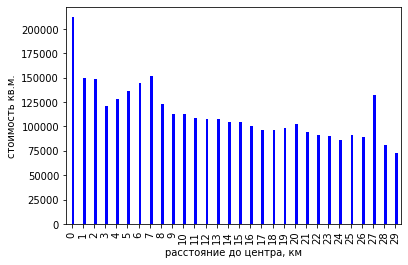

In [ ]:
data_sp.plot.bar(xlabel='расстояние до центра, км', ylabel='стоимость кв.м.', legend=None, color='b');

Общая тенденция снижения стоимости кв.м. квартиры по мере удаления от центра наблюдается. Однако стоит отметить, что присутствуют промежутки, где цена кв.м. наоборот увеличивается. Таким образом можно сделать вывод, что помимо отдаленности от центра на стоимость влияют также другие факторы (как пример - престижность района).

### Общий вывод

Для исследования были использованы данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
В данных, где это было возможно, были заполнены пропуски, устранены неявные дубликаты, устранены редкие и выбивающиеся значения. Основной подход при предобработке данных заключался в максимальном сохранении данных для дальнейшего анализа, поэтому всего було удалено 1,3 % данных. Для удобства работы были добавлены новые столбцы.
Были рассмотрены основные параметры объектов выставленных на продажу и выявлено, что наибольшее количество квартир продается с общей площадью 30-50 кв.м., жилой - в районе 20 кв.м., площадью кухни - 7-12 кв.м. , ценой в пределах 2 - 5 млн.руб., с 1 или 2 комнатами, высотой потока в промежутке 2.5 - 2.7 м. Большинство квартир продаются в 5-этажных и 9-этажных домах, а сами квартиры располагаются в большинстве случаев на этажаж с 1 по 5. Удаленность от аэропорта у большинства - 10-37 км.
Также было замечено, что  в основном объявления размещают с понедельника по пятницу, в 1 и 10 числах месяца, больше всего публикуют в феврале и марте, а меньше всего в мае.
В большинстве случаев на продажу уходит до 95 дней. Присутствуют быстрые продажи до 30 дней, и необычно долгие - свыше 500 дней.
Были изучены параметры влияющие на стоимость объекта. Выявлено, что на стоимость оказывает прямое влияние количество комнат, этаж, также опосредовано можно наблюдать влияние площади объекта. Замечено, что стоимость меняется в зависимости от года размещения объявления.
Были проанализированы 10 населенных пунктов с наибольшим числом объявлений  и выявлено, что самая высокая стоимость кв. м. в Санкт-Петербурге, самая низкая – Выборге. Изучив влияние в Санкт-Петербурге удаленности от центра города на стоимость кв.м., можно отметить, что небольшая зависимость имеется, но помимо отдаленности от центра на стоимость видимо влияют также другие факторы.
Таким образом, основными параметрами для определения рыночной стоимости объектов недвижимости будут являться количество комнат, этаж, общая площадь.